# Investigating Fandango Movie Ratings.

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). He published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) — a great piece of data journalism that's totally worth reading.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars. Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:
- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

In this analysis, we want to find out if there has been a change in the Fandango rating system by comparing the [data](https://github.com/fivethirtyeight/data/tree/master/fandango) used in the article by Walt Hickey(2015) and [data](https://github.com/mircealex/Movie_ratings_2016_17) from the Fandango website after(2016-2017).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


fandango_1 = pd.read_csv('fandango_score_comparison.csv') # the walt hicky data
fandango_2 = pd.read_csv('movie_ratings_16_17.csv') # the 2016-2017 data

In [2]:
fandango_1.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
fandango_2.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
# creating copies of the data
# so we do not lose the original dataframe

fandango_prev = fandango_1.copy() 
fandango_curr = fandango_2.copy()

In [5]:
# Isolating columns from fandango
# We are only interested in the fandango ratings

fandango_curr = fandango_curr[['movie', 'year', 'fandango']]
fandango_prev = fandango_prev[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
                             'Fandango_votes', 'Fandango_Difference']]

## Assessment of our sampling technique

Going through the README files of the data sets it is immediately clear that our samples are not representative of the population. In the original analysis by walt hickey, he only picked movies that had at least 30 user votes. Not all movies had an equal chance of getting picked. 

In the second dataset that was scraped from the fandango website(2016-2017) the analyst only stated that they picked movies that were popular but did not go ahead to define popularity. This is also not representative of the entire fandango movie population thus our investigation will be flawed. 

To combat this we have to change the aim of our analysis and possibly the overall title or go ahead to scrape the website again. This is almost impossible now so we are going to change the aim of our analysis to finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. However, defining popular movies might be a problem as the author of the second dataset did not define 'popularity'. 

As a baseline we can define popularity as any movie withat least 30 user votes as defined in the first dataset. We can now go ahead to take a random sample from the second dataset and check its popularity by checking the fandango website. 

In [6]:
# first we check if all movies in the first dataset 
# has at least 30 user votes
(fandango_prev.Fandango_votes <30).sum()

0

In [7]:
# take a random sample from the more recent dataset
# check the user ratings from the fandango website

fandango_curr.sample(10, random_state=1) # random state of 1 so it is clear we
                                         # aren't looking for the most representative sample of 10.
                                         

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As at the time of writing this, 2021, all the movies have numerous user votes. The problem here is that this was not likely the case as at the time of scraping this dataset, however, we will go ahead to carry out our analysis on it.

Before we continue let us isolate the data from 2015 from the earlier datset and the data from 2016 from the more recent dataset.

In [8]:
fandango_2016 = fandango_curr[fandango_curr.year == 2016].copy()
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [9]:
fandango_2016.index = np.arange(0, 191) # to make the index uniform
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Hologram for the King,2016,3.0
4,A Monster Calls,2016,4.0


In [10]:
fandango_prev.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


This dataset doesnt have a column for year. The film column however has  the year each movie was released thus we'll extract the 'year' from it and use it create another column.

In [11]:
fandango_prev['year'] = fandango_prev['FILM'].str[-5:-1]
fandango_2015 = fandango_prev[fandango_prev.year == '2015'].copy()
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [12]:
# to make the index uniform

fandango_2015.index = np.arange(0, 129)
fandango_2015

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
...,...,...,...,...,...,...
124,Inside Out (2015),4.5,4.5,15749,0.0,2015
125,Mr. Holmes (2015),4.0,4.0,1348,0.0,2015
126,'71 (2015),3.5,3.5,192,0.0,2015
127,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0,2015


After all these preliminary steps, we can now start analyzing the two samples we isolated before. Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

There are many ways we can go about with our analysis, but let's start simple with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

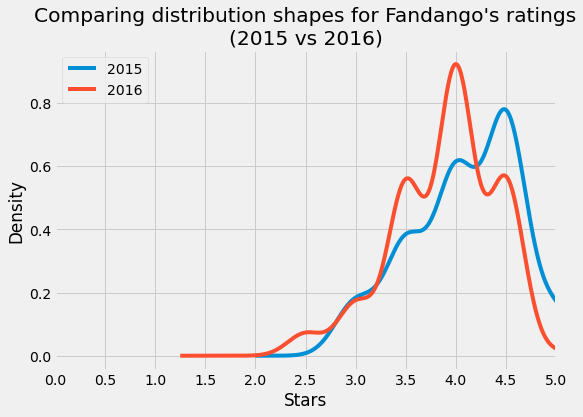

In [13]:
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)") 
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(np.arange(0,5.1,.5))
plt.show()


In the figure above we can see that the 2015 and 2016 ratings are skewed to the the left(negatively skewed) with the 2015 ratings being more skewed relative to that of 2016. This shows that indeed there is a difference between the 2016 and 2015 rating by fandango.

Keeping in mind that fandango also sells movie tickets it is a bit suspect that most of their ratings are on the high side.

While comparing the distributions with the help of the kernel density plots is a great start, we now need to analyze more granular information. Lets use frequency distribution tables. I'll use relative frequencies and not absolute frequencies because relative frequencies paint a better picture in this scenario.

In [14]:
print('2015' + '\n' + '-' * 20) 
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015
--------------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [15]:
print('2016' + '\n' + '-' * 20) 
fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2016
--------------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The differences is not immediately apparent in the series above thus we'll compute the summary statistics and create a grouped bar chart to visualise it properly.

In [17]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 =fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output for mode is slightly different.

mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

In [24]:
# summarize our findings in a table
summary = pd.DataFrame()

summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']

In [25]:
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


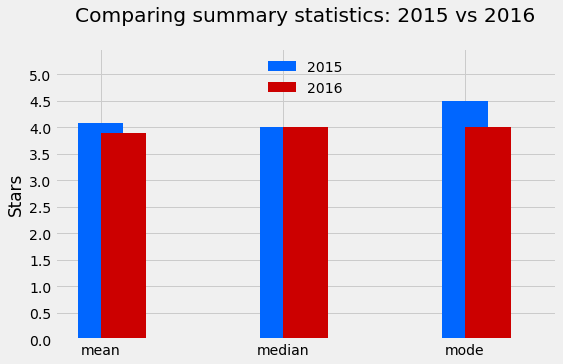

In [27]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

# Conclusion 

There is a slight but clear difference between the 2015 and 2016 movie ratings by Fandango with thw 2016 ratings being lower. 
The reason for this is not clear, however, it is very likely that it is due to the [original analysis](https://fivethirtyeight.com/features/fandango-movies-ratings/) done by WALT HICKEY. 